### Digit Classification using Random Forest Tree

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [134]:
from sklearn.datasets import load_digits
dataset = load_digits()
X = dataset.data
Y = dataset.target

#### PCA

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_scaled = StandardScaler().fit_transform(X)
X_standard = PCA(n_components=0.98).fit_transform(X_scaled)
X_standard.shape

(1797, 49)

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_standard,Y,train_size=0.8,shuffle=True)

In [137]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.9611111111111111

In [138]:
Y_pred = clf.predict(X_test)

In [139]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(Y)
Y_pred_bin = lb.transform(Y_pred)

In [140]:
from sklearn.metrics import log_loss, hinge_loss
print(f'Hinge loss:{hinge_loss(Y_test,Y_pred_bin)}')
print(f'Log loss:{log_loss(Y_test,Y_pred_bin)}')

Hinge loss:0.07777777777777778
Log loss:1.3431746375798685


In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  1, 30,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  1,  0, 32,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  1, 34]])

Text(50.722222222222214, 0.5, 'Predicted labels')

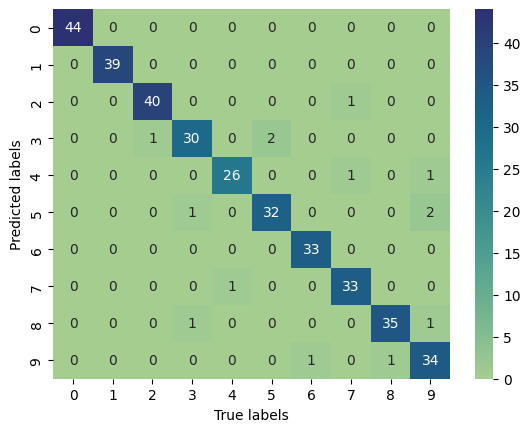

In [142]:
sns.heatmap(cm,annot=True,cmap='crest')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')